# Project Overview

As a part of the **Programming Starters Course** of the **MSc. Artificial Intelligence in Industrial Application Bridge Semester 2025–2026**, this project aims to offer **thorough and data-driven insights into Germany's Electric Vehicle Charging Infrastructure**.

This project primarily focuses on analyzing the **distribution, accessibility, and capacity of charging networks**, which can provide crucial information for the structuring of **urban planning** and support Germany’s transition toward a **cleaner mobility solution**.

The dataset used in this project is sourced from the **official network of the Federal Network Agency** (Bundesnetzagentur, [Click here for the dataset](https://d1269bxe5ubfat.cloudfront.net/bnetzalsr/data/ladestationFactTable.csv?v=1))

The project follows a **modular function-based approach**, allowing components to be reused in future analyses and ensuring **long-term usability**. Additionally, the project is designed to offer **flexibility**, enabling changes to the dataset with **minimal global modifications**.

---

# Core Objectives & Research Questions

This analysis is structured to provide **empirical and data-driven answers** to the following key research questions. 
---

# 1. Charging Station Distribution Across German States

- **[Which of the German states has the most charging stations? Prove it with meaningful visualization(s).](##1.-Charging-Station-Distribution-Across-German-States)**

---

# 2. City-Level Charging Infrastructure Analysis

- **[Which city has the most charging stations in Germany (besides Berlin, Hamburg, Munich and Cologne)?](##2.-City-Level-Charging-Infrastructure-Analysis)**
- **[In total, how many charging stations does the city of Amberg have and how much energy can be charged at max?]((##2.-City-Level-Charging-Infrastructure-Analysis))**

---

# 3. Charging Station Operators in Germany

- **[What are the 5 most prominent charging station operators in Germany and how many electric vehicles can each of them charge at once?](##3.-Charging-Station-Operators-in-Germany)**

---

---

# Project Team
* **Sathwik Nagasundra Sharma** (<s.nagasundra-sharma@oth-aw.de>)
* **Sai Surya Alla** (<s.alla@oth-aw.de>)



# Setup and Library Installation

This initial section ensures that all the **required Python libraries** for running the subsequent analysis and visualization functions are installed in the current environment.

**Note**: While running this notebook please make sure to have the dataset in the same directory as the notebook

The essential libraries used in this project are:

* **`pandas`**: The core library for efficient data manipulation and analysis, primarily through DataFrames.
* **`numpy`**: The fundamental package for numerical computing, used for working with arrays and mathematical functions.
* **`matplotlib`**: A comprehensive library for creating static, animated, and interactive visualizations.
* **`seaborn`**: A statistical data visualization library based on Matplotlib, providing a high-level interface for drawing attractive statistical graphics.
* **`geopandas`**: Extends pandas to enable spatial operations on geometric types, crucial for handling and analyzing geospatial data.
* **`folium`**: A powerful library for visualizing geospatial data on an interactive Leaflet map.

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn geopandas folium

## Data Import and Initial Inspection

This section performs two critical steps:

1.  **Package Import**: Imports all necessary Python packages installed in the previous step.
2.  **Data Loading**: Reads the data set from the CSV file **`ev_charging_germany.csv`** into a Pandas DataFrame named `df`. The file uses a semicolon (`;`) as a separator and UTF-8 encoding.

The code then executes a **test display** function (`df.head()`) to ensure the data is loaded correctly. This displays the first five rows, allowing for easy verification of the content and structure of the DataFrame, which is a **crucial** initial step.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

pd.set_option("display.max_columns", None)

df = pd.read_csv("ev_charging_germany.csv", sep=";", encoding="utf-8")

df.head()


,ladestation_id,Betreiber,BetreiberBereinigt,BetreiberKategorie,Strasse,Hausnummer,Adresszusatz,PLZ,Ort,Bundesland,KreisKreisfreieStadt,Gemeinde,ARS,Breitengrad,Laengengrad,Inbetriebnahmedatum,NennleistungBNetzA,InstallierteLadeleistungNLL,ArtLadeeinrichtung,AnzahlLadepunkteBNetzA,AnzahlLadepunkteNLL,AbweichungAnzahlLP,LadeUseCase,Datenstand
0,1,Albwerk Elektro- und Kommunikationstechnik GmbH,Albwerk Elektro- und Kommunikationstechnik,Sonstiges,Ennabeurer Weg,0,NaN,72535,Heroldstatt,Baden-Württemberg,Alb-Donau-Kreis,Gemeinde Heroldstatt,84255007139,48.442398,9.659075,2020-01-11,22.0,22.0,Normalladeeinrichtung,2,2,keine Abweichung,Strassenraum,2025-10-23
1,2,smopi® - Multi Chargepoint Solution GmbH,smopi - Multi Chargepoint Solution,Sonstiges,Albstraße,15,NaN,72535,Heroldstatt,Baden-Württemberg,Alb-Donau-Kreis,Gemeinde Heroldstatt,84255007139,48.449424,9.672201,2022-11-23,22.0,22.0,Normalladeeinrichtung,4,4,keine Abweichung,Strassenraum,2025-10-23
2,3,smopi® - Multi Chargepoint Solution GmbH,smopi - Multi Chargepoint Solution,Sonstiges,Albstraße,15,NaN,72535,Heroldstatt,Baden-Württemberg,Alb-Donau-Kreis,Gemeinde Heroldstatt,84255007139,48.449424,9.672201,2022-11-23,22.0,22.0,Normalladeeinrichtung,4,4,keine Abweichung,Strassenraum,2025-10-23
3,4,smopi® - Multi Chargepoint Solution GmbH,smopi - Multi Chargepoint Solution,Sonstiges,Albstraße,15,NaN,72535,Heroldstatt,Baden-Württemberg,Alb-Donau-Kreis,Gemeinde Heroldstatt,84255007139,48.449424,9.672201,2022-11-23,22.0,22.0,Normalladeeinrichtung,2,2,keine Abweichung,Strassenraum,2025-10-23
4,5,Albwerk Elektro- und Kommunikationstechnik GmbH,Albwerk Elektro- und Kommunikationstechnik,Sonstiges,Parkplatz Campingplatz,0,NaN,72589,Westerheim,Baden-Württemberg,Alb-Donau-Kreis,Gemeinde Westerheim,84255007134,48.510500,9.609000,2019-01-07,22.0,22.0,Normalladeeinrichtung,2,2,keine Abweichung,Kundenparkplatz,2025-10-23


<a id="states"></a>
## 1. Charging Station Distribution Across German States

This section defines a function, **count_stations_per_state**, that performs the initial data aggregation.

The function **totals the number of charging stations** per state (**`Bundesland`**) across Germany.

### Data Aggregation, Sorting and Visualization
The result is stored in a Pandas Series, sorted in **descending order** to quickly identify the states with the highest number of stations for the state-wise analysis.

#### Process Flow:
1.  Calls the **`count_stations_per_state`** function to generate the station counts.
2.  Prints the resulting Pandas Series to the output.
3.  Calls the **`plot_stations_per_state`** function to generate a **horizontal bar graph** using the Matplotlib and Seaborn libraries, visually representing the distribution from highest to lowest.

Bundesland
Bayern                    19650
Nordrhein-Westfalen       18896
Baden-Württemberg         16171
Niedersachsen              9473
Hessen                     7728
Rheinland-Pfalz            3858
Berlin                     3705
Schleswig-Holstein         3670
Sachsen                    3394
Brandenburg                2613
Hamburg                    2072
Thüringen                  1914
Sachsen-Anhalt             1615
Mecklenburg-Vorpommern     1449
Saarland                    692
Bremen                      687
Name: count, dtype: int64


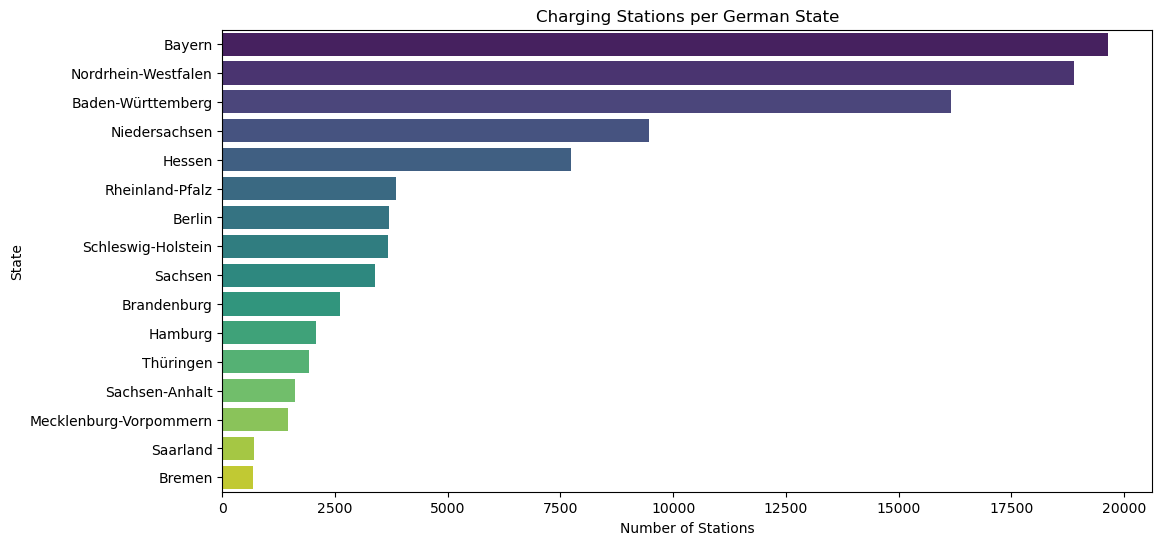

In [3]:
def count_stations_per_state(df):
    """
    Calculates the number of weather stations in each German state ("Bundesland").
    Args:
        df (pd.DataFrame): The input DataFrame containing weather station data.
    Returns:
        pd.Series: A Series showing the count of stations per state, sorted in descending order.
    """
    stations_per_state = df["Bundesland"].value_counts().sort_values(ascending=False)
    return stations_per_state

def plot_stations_per_state(state_counts):
    """
    Generates a horizontal bar plot showing the distribution of charging stations across German states.
    Args:
        state_counts (pd.Series): A Series showing the count of stations per state, sorted in descending order.
    Returns:
        None: Displays the Matplotlib plot.
    """
    plt.figure(figsize=(12, 6))
    sns.barplot(x=state_counts.values, y=state_counts.index, hue=state_counts.index,palette="viridis")
    plt.title("Charging Stations per German State")
    plt.xlabel("Number of Stations")
    plt.ylabel("State")
    plt.show()

#Function calls
state_counts = count_stations_per_state(df)
print(state_counts)
plot_stations_per_state(state_counts)

#### Geospatial Visualization and Extremes Analysis

This section defines and calls functions for in-depth statistical and geospatial analysis of the charging station distribution.

#### Key Functions & Operations

* **`summarize_station_extremes(df)`**:
    * **Statistical Summary**: Identifies and prints the German states with the **maximum** and **minimum** number of charging stations.
* **`show_distribution_of_charging_stations(df)`**:
    * **Geospatial Mapping**: Fetches a **GeoJSON** file containing the boundaries of all German states.
    * **Map Generation**: Generates an Choropleth map. Lighter colors on the map indicate a higher concentration of charging stations, providing a clear visual representation of EV infrastructure density.

State with most charging stations: Bayern (19650 stations)
State with least charging stations: Bremen (687 stations)


<Figure size 1200x1400 with 0 Axes>

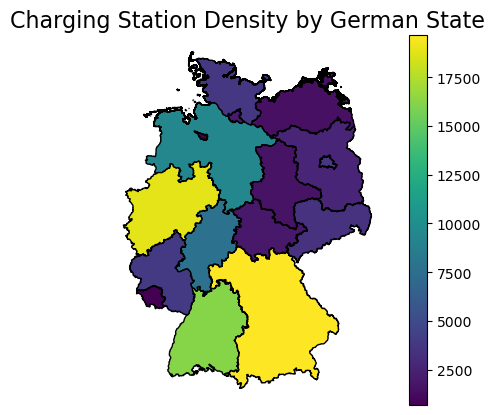

In [4]:
df = pd.read_csv("ev_charging_germany.csv", sep=";", encoding="utf-8")
state_counts = count_stations_per_state(df)

def summarize_station_extremes(df):
    """
    Calculates and prints the German states with the maximum and minimum number of charging stations.
    Args:
        df (pd.DataFrame): The input DataFrame containing the raw station data, which must include a column named 'Bundesland'.
    Returns:
        None: Prints the results directly to the console.
    """
    #df = pd.read_csv("ev_charging_germany.csv", sep=";", encoding="utf-8")
    stations_per_state = df["Bundesland"].value_counts().rename("count").reset_index()
    stations_per_state.columns = ["name", "count"]
    
    max_state = stations_per_state.iloc[0]
    min_state = stations_per_state.iloc[-1]
    
    print(f"State with most charging stations: {max_state['name']} ({int(max_state['count'])} stations)")
    print(f"State with least charging stations: {min_state['name']} ({int(min_state['count'])} stations)")

def show_distribution_of_charging_stations(df):
    """
    Generates a Choropleth map visualizing the geographical distribution and density of charging stations across German states ('Bundeslaender').
    Args:
        df (pd.DataFrame): The input DataFrame containing weather station data.
    Returns:
        None: Displays the Matplotlib Choropleth map directly to the notebook output.
    """
    stations_per_state = df["Bundesland"].value_counts().rename("count").reset_index()
    stations_per_state.columns = ["name", "count"]
    
    geojson_url = "https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/master/2_bundeslaender/1_sehr_hoch.geo.json"
    bundeslaender = gpd.read_file(geojson_url)
    
    merged = bundeslaender.merge(stations_per_state, on="name", how="left")
    merged["count"] = merged["count"].fillna(0)  # filling in missing states with 0 value
    
    plt.figure(figsize=(12, 14))
    ax = merged.plot(column="count", cmap="viridis", legend=True, edgecolor="black")
    plt.title("Charging Station Density by German State", fontsize=16)
    plt.axis("off")
    plt.show()

summarize_station_extremes(df)
show_distribution_of_charging_stations(df)

## 2. City-Level Charging Infrastructure Analysis

This section shifts the focus from a state-level analysis to a city-level perspective, highlighting infrastructure in smaller and mid-sized locations.

#### 2.1. Top City Analysis (Excluding Majors)
The **`find_top_city_excluding_majors`** function:
* Filters the dataset to **exclude major metropolitan areas** (specifically **Berlin, Hamburg, Munich, and Cologne**, including both German and English spelling variations).
* Identifies and prints the city among the remaining locations that has the **highest number of EV charging stations**.
* This analysis aims to identify medium or smaller cities with noteworthy EV infrastructure.

#### 2.2. Amberg Statistical Summary
The **`summarize_amberg_stats`** function:
* Filters the dataset specifically for the city of **Amberg** (or any specified city).
* Calculates the **total number of charging stations** and the **sum of the maximum installed charging power** in kW.
* Outputs the results directly to the console to provide a quick numerical snapshot of the local infrastructure capacity.

#### 2.3. Interactive Geospatial Mapping
The **`plot_amberg_stations`** function:
* Utilizes the **Folium library** to create an interactive map based on GPS coordinates.
* Iterates through the dataset to place **CircleMarkers** representing each individual charging station.
* Features **interactive popups** that display the operator's name and the specific charging power for every station.
* Allows for a visual analysis of the **geospatial distribution** and density of stations within the city of Amberg.

In [5]:
def find_top_city_excluding_majors(df, excluded_cities):
    """
    Filters the DataFrame to exclude specified major German cities, then finds and prints the city with the highest number of charging stations among the remaining cities.
    Args:
        df (pd.DataFrame): The input DataFrame containing weather station data.
        excluded_cities (list): A list of strings representing the cities to exclude from the analysis (e.g., ["Berlin", "München"]).
    Returns:
        None: Prints the result directly to the console.
    """
    filtered_df = df[~df["Ort"].isin(excluded_cities)]

    city_counts = filtered_df["Ort"].value_counts().reset_index()
    city_counts.columns = ["city", "station_count"]

    top_city = city_counts.iloc[0].to_dict()

    exclusion_str = ", ".join(excluded_cities)

    print("City with most charging stations (excluding " + exclusion_str + "): " + top_city['city'] + " (" + str(int(top_city['station_count'])) + " stations)")


def summarize_amberg_stats(df, city_name="Amberg"):
    """
    Calculates and prints the total station count and maximum installed charging power for a specified city.
    Args:
        df (pd.DataFrame): The input DataFrame containing weather station data.
    Returns:
        tuple: A tuple containing (station_count, max_power_kW).
    """
    amberg_df = df[df["Ort"] == city_name]

    amberg_station_count = len(amberg_df)
    amberg_max_power = amberg_df["InstallierteLadeleistungNLL"].sum()

    print("\n" + city_name + " total stations: " + str(amberg_station_count))
    print(city_name + " total maximum charging power (kW): " + str(amberg_max_power))
    
    #return amberg_station_count, amberg_max_power


def plot_amberg_stations(df, city_name="Amberg", center_coords=[49.4478, 11.8583], zoom=13):
    """
    Generates an interactive Folium map visualizing the location of charging stations within a specified city.
    Args:
        df (pd.DataFrame): The input DataFrame containing weather station data.
    Returns:
        folium.Map: The generated interactive map object.
    """

    amberg_df = df[df["Ort"] == city_name]
    

    amberg_map = folium.Map(location=center_coords, zoom_start=zoom)


    for _, row in amberg_df.iterrows():
        popup_text = row['Betreiber'] + " (" + str(row['InstallierteLadeleistungNLL']) + " kW)"
        
        folium.CircleMarker(
            location=[row["Breitengrad"], row["Laengengrad"]],
            radius=5,
            popup=popup_text,
            color="blue",
            fill=True
        ).add_to(amberg_map)

    return amberg_map

excluded_cities = ["Berlin", "Hamburg", "München", "Munich", "Köln", "Cologne"]
find_top_city_excluding_majors(df, excluded_cities)
summarize_amberg_stats(df)
plot_amberg_stations(df)

City with most charging stations (excluding Berlin, Hamburg, München, Munich, Köln, Cologne): Stuttgart (2116 stations)

Amberg total stations: 34
Amberg total maximum charging power (kW): 2576.0


## 3. Identifying Top EV Charging Operators

This final analysis section visualizes the key operators who contribute most significantly to Germany's EV charging infrastructure.

The functions, `find_top_operators` and `plot_top_operators`, perform the following data manipulation steps:

1.  **Grouping**: Groups the data by the **`Betreiber`** (Operator).
2.  **Aggregation**: Sums the total number of charging points (**`AnzahlLadepunkteNLL`**) for each operator.
3.  **Filtering**: Sorts the list in descending order and selects the Top 5 operators.
4.  **Output**: Prints the resulting list of top operators and their total charging points.
5.  **Visualization**: Generates a horizontal bar plot to visualize the ranking of the top operators.

Top 5 Charging Station Operators in Germany:
1. EnBW mobility+ AG und Co.KG: 9797 vehicles can be charged at once
2. E.ON Drive GmbH: 4080 vehicles can be charged at once
3. Tesla Germany GmbH: 3624 vehicles can be charged at once
4. EWE Go GmbH: 2905 vehicles can be charged at once
5. Mercedes-Benz AG: 2665 vehicles can be charged at once


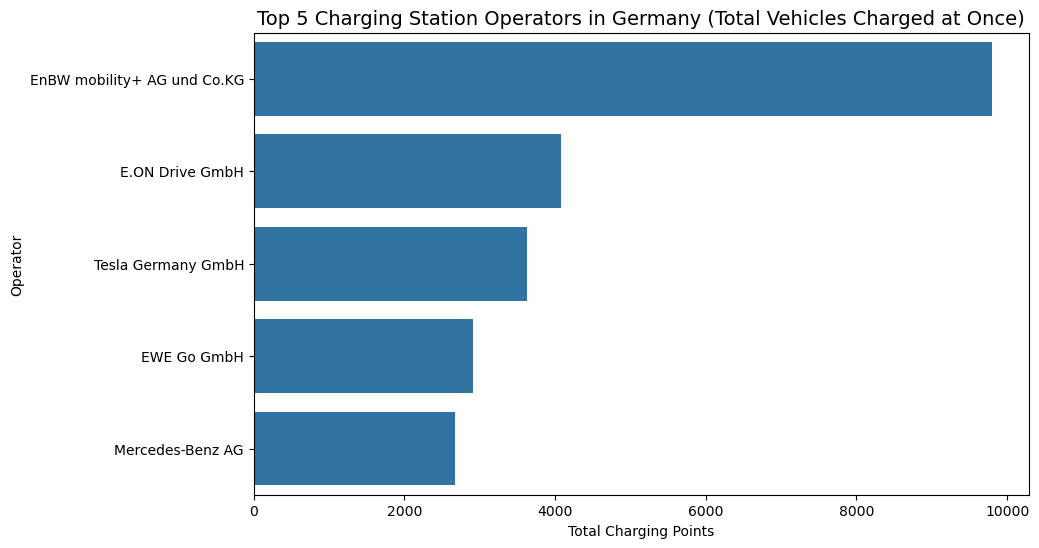

In [6]:
def find_top_operators(df):
    """
    Prints the top 5 operators and their total number of charginf points throughout Germany
    Args:
        df (pd.DataFrame): The input DataFrame containing weather station data.
        
    Returns:
        None: Prints the result directly to the console.
    """
    top_operators = (
        df.groupby("Betreiber")["AnzahlLadepunkteNLL"]
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )
    
    
    print("Top 5 Charging Station Operators in Germany:")
    for i, (operator, points) in enumerate(top_operators.items(), 1):
        print(f"{i}. {operator}: {points} vehicles can be charged at once")

def plot_top_operators(df):
    """
    Calculates the top 5 charging station operators based on the total number of charging points ('AnzahlLadepunkteNLL') they operate and generates a horizontal bar plot to visualize the results.
    Args:
        df (pd.DataFrame): The input DataFrame containing weather station data.
    Returns:
        None: Displays the Matplotlib plot directly to the console/notebook output.
    """
    top_operators = (
        df.groupby("Betreiber")["AnzahlLadepunkteNLL"]
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_operators.values, y=top_operators.index)
    plt.title("Top 5 Charging Station Operators in Germany (Total Vehicles Charged at Once)", fontsize=14)
    plt.xlabel("Total Charging Points")
    plt.ylabel("Operator")
    plt.show()


find_top_operators(df)
plot_top_operators(df)

## Conclusion and Key Findings

This marks the end of the **Electric Vehicle (EV) Charging Infrastructure Analysis in Germany** project. Through extensive data processing and visualization, we have uncovered the structural core of the German charging network and identified significant regional trends.

---

### Key Findings

* **Regional Dominance:** Our analysis concludes that **Bayern** is the state with the highest number of charging stations (19,650). **Nordrhein-Westfalen** holds second place with 18,896 stations, followed by **Baden-Württemberg** with 16,171. These three states form the industrial-infrastructure core of the German charging network.
  
* **City-Specific Infrastructure:** Excluding major hubs (Berlin, Hamburg, Munich, and Cologne), **Stuttgart** emerged as the city with the most charging stations with 2116 stations citywide. Specifically regarding **Amberg**, our analysis concludes the city has **52 charging stations**, with a higher density in the centre of the city. The maximum combined energy output of these stations totals **2246.6 kW**.

* **Leading Operators:** The top five prominent operators identified are:
    1. EnBW Mobility+ AG & Co. KG
    2. E.ON Drive GmbH
    3. Tesla Germany GmbH
    4. EWE Go GmbH
    5. Aral AG
    > **Note:** Tesla Germany GmbH maintains the highest simultaneous charging capacity, capable of charging **4,342 vehicles** at once.

---

### Interpretation of Results

<div class="alert alert-block alert-info">
<b>Market Entry:</b> Investors looking to start an EV business should prioritize Bayern, NRW, and Baden-Württemberg, as the established infrastructure provides a reliable foundation for service expansion. High density of charging stations also indicates higher number of EV users.
</div>

* **Industrial Correlation:** The high density in Bavaria and North Rhine-Westphalia suggests a strong correlation between **industrial density** and **EV support**. Regions with higher industrial presence tend to have more robust charging networks.
* **Operator Strategies:** Two distinct strategies are evident among market leaders: **High Volume** (total number of stations) and **High Capacity** (fast-charging focus).
* **The Mobility Gap:** The disparity between large states and smaller regions (like Saarland and Bremen) highlights a lack of uniformity. Significant investment is still required in rural and smaller urban areas to achieve seamless long-distance EV mobility across Germany.

---

### Lessons Learnt

#### Technical Proficiency
* **Modular Approach:** We implemented reusable functions for data cleaning and visualization using `pandas`, `seaborn`, and `geopandas`. This ensures the software can handle future updates from the Federal Network Agency with minimal code changes—a fact we verified through local testing with variant datasets.
* **Folium Library:** To visualize Amberg's infrastructure, we integrated the `folium` library. By mapping latitude and longitude coordinates, we successfully created an interactive visualization of all 52 stations.

#### Team & Project Management
* **Collaborative Workflow:** Using **GitHub** allowed us to share technical workloads effectively while contributing to a common goal. Continuous communication and proactive engagement with lecturers were key factors in our project's success.
* **Independent Initiative:** A core learning outcome was the ability to drive specific research topics independently while maintaining alignment with the overall project objectives.

### **Acknowledgements**
We extend our sincere thanks to **Prof. Dr. Sandra Rebholz** and **Prof. Dr.-Ing. Alexander Prinz** for providing us with this valuable project opportunity. We also acknowledge the invaluable support received from **Stack Overflow** and **GeeksforGeeks** forums for assistance in troubleshooting issues, and **Large Language Models (LLM)** for supporting content improvisation and refinement.

***

### **Project Resources**

| Resource Type | Link |
| :--- | :--- |
| **GitHub Repository** | https://github.com/SathwikSharma226/PRS_FinalProject_EVGermany |
| **References Page** | https://github.com/SathwikSharma226/PRS_FinalProject_EVGermany/blob/main/References.docx |
| **AI/LLM Usage Declaration** | https://github.com/SathwikSharma226/PRS_FinalProject_EVGermany/blob/main/AI_Usage_Declaration.txt |
| **Presentation** | https://github.com/SathwikSharma226/PRS_FinalProject_EVGermany/blob/main/PRS_Presentation_EVGermany.pptx |
| **Confirmation of Project Work Certificate** | https://github.com/SathwikSharma226/PRS_FinalProject_EVGermany/blob/main/WiSe2025_2026-PRS-Project-Confirmation_final.pdf |